### `Import main Libraries and Frameworks`

In [1]:
## main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import boxcox
plt.style.use('ggplot')
import joblib

## for preprocessing and preparing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import utils

## Models -- sklearn
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

## Models -- Xgboost
from xgboost import XGBRegressor, plot_importance

### `Reading the Dataset and Look at the big Picture`

In [2]:
## Reading the Dataset --> New Dataset insted of DELTA, givem (IRF (target) & IR0 (Feature)) 
## This Dataset will outperform the old one
df = pd.read_excel('dataset.xlsx', sheet_name='Sheet1')
## Shuffling the Dataset to split randomly --> helping the model for good training 
df = utils.shuffle(df, random_state=123)
df.head()  ## showing the head of the DF

,IRIF(in/mile),IRI0(in/mile),AGE,FC%,LC(ft/mile),TC(ft/mile),RUT(in)
1584,61.354331,59.968504,3.99,0.000000,0.000000,0.0000,0.157480
249,74.771654,45.795276,13.46,10.295164,7431.965741,1806.1887,0.236220
1142,34.204724,27.716535,3.39,0.000000,0.000000,0.0000,0.157480
809,44.472441,44.346457,0.85,0.000000,0.000000,0.0000,0.078740
657,78.992126,71.370079,0.62,0.000000,0.000000,0.0000,0.590551


### `Exploring the Dataset and Feature Engineering`

In [3]:
## take a copy from the main DataFrame for changing of Feature Engineering
df_new = df.copy()  

## df_new --> will be changed according to my transformation in order to test them
## df --> still as it is without changing, will be splitted later 

### `Explore the (IRIF(in/mile)) Column (target)`

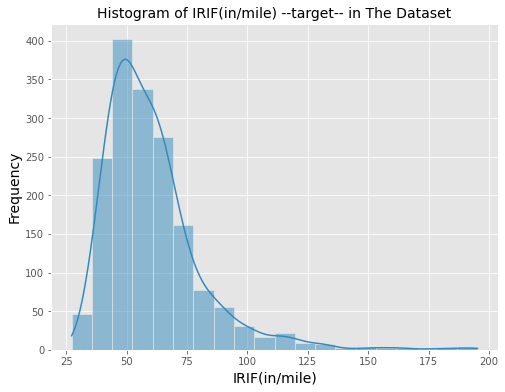

In [4]:
## Explore the Target --> (IRIF(in/mile))
plt.figure(figsize=(8, 6))
sns.histplot(x='IRIF(in/mile)', data=df_new, bins=20, kde=True)
plt.xlabel('IRIF(in/mile)', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of IRIF(in/mile) --target-- in The Dataset', fontsize=14, color='k')
plt.show()

* >`It seems that it takes (exponential Distribution) -- it is preferable to take the log, take log(value)`

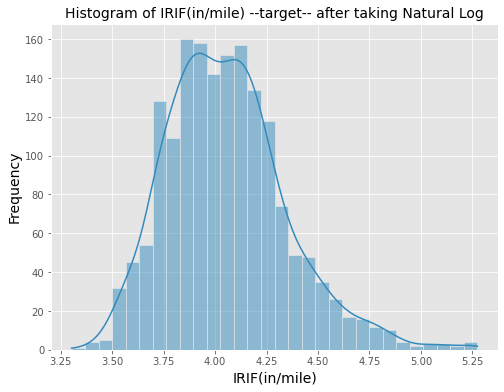

In [5]:
## taking the natural log for this column --> will be almost Normal Distribution
df_new['IRIF(in/mile)'] = np.log(df_new['IRIF(in/mile)'])  ## doesn't contains zeros, only take the natural log(value)


## check Distribution again
plt.figure(figsize=(8, 6))
sns.histplot(df_new['IRIF(in/mile)'], bins=30, kde=True)
plt.title('Histogram of IRIF(in/mile) --target-- after taking Natural Log', fontsize=14, color='k')
plt.xlabel('IRIF(in/mile)', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.show()

* > `It seems that it transformed to Normal Distribution and that exactly what I need, so, we will apply this Transformation for the target column (IRIF(in/mile)), taking natural log (value) for the target`

-------

### `Explore the (IRI0(in/mile)) Column`

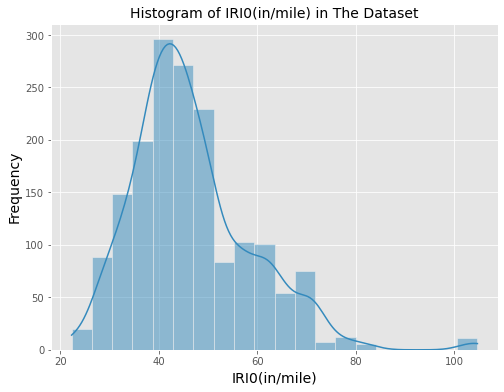

In [6]:
## Explore (IRI0(in/mile))
plt.figure(figsize=(8, 6))
sns.histplot(x='IRI0(in/mile)', data=df_new, bins=20, kde=True)
plt.xlabel('IRI0(in/mile)', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of IRI0(in/mile) in The Dataset', fontsize=14, color='k')
plt.show()

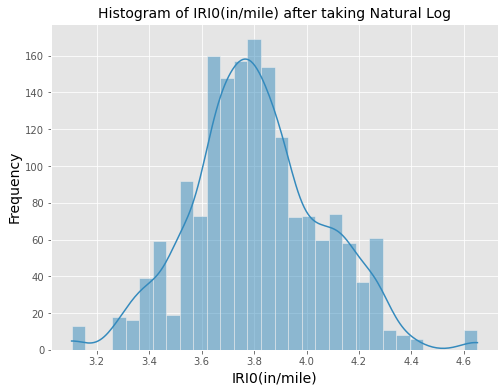

In [7]:
## taking the natural log for this column --> will be almost Normal Distribution
df_new['IRI0(in/mile)'] = np.log(df_new['IRI0(in/mile)'])


## check Distribution again
plt.figure(figsize=(8, 6))
sns.histplot(df_new['IRI0(in/mile)'], bins=30, kde=True)
plt.title('Histogram of IRI0(in/mile) after taking Natural Log', fontsize=14, color='k')
plt.xlabel('IRI0(in/mile)', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.show()

* > `Doing the same what we did in the target column, it seems that taking natural log(value) for (IRI0(in/mile)) will leads to Normal Distribution and that is excatly what wed need.`

----

### `Explore the (AGE) Column`

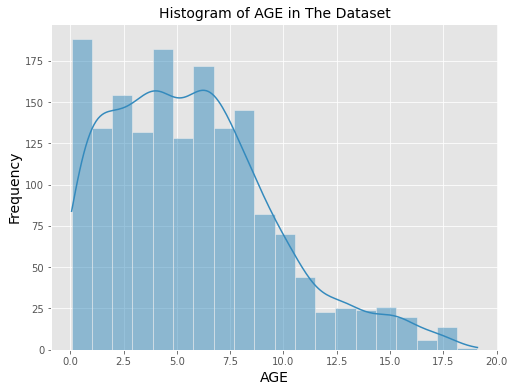

In [8]:
## Explore the AGE Column
plt.figure(figsize=(8, 6))
sns.histplot(x='AGE', data=df_new, bins=20, kde=True)
plt.xlabel('AGE', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of AGE in The Dataset', fontsize=14, color='k')
plt.show()

* >`I will try using (box-cox) transformation for this column`

<img src='https://miro.medium.com/max/884/1*_nHvGg-OQYtNSSZph-424g.png' alt="boxcox" width=400>

#### [Great Article for box cox](https://onlinestatbook.com/2/transformations/box-cox.html)
#### [How do box-cox in Excel](https://www.statology.org/box-cox-transformation-excel/)

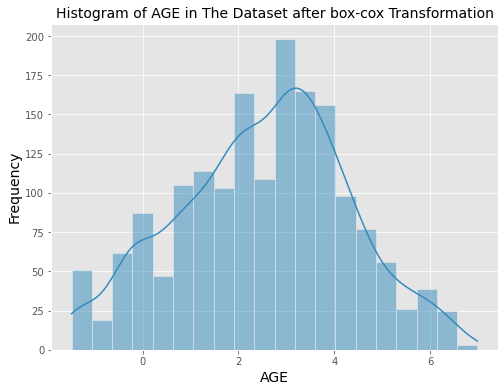

In [9]:
## Let's try Boxcox  ---> Normal Distribution
df_new['AGE'], lmd_age = boxcox(df_new['AGE']) ## returns two things (the transformed values & lambda) 

## doing box-cox for the whole dataset, we will not do that while training --> continue reading the Notebook  

## Check again
plt.figure(figsize=(8, 6))
sns.histplot(x='AGE', data=df_new, bins=20, kde=True)
plt.xlabel('AGE', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of AGE in The Dataset after box-cox Transformation', fontsize=14, color='k')
plt.show()

* >`That excatly what I need, it transformed to Normal Distribution`

----

### `Explore the (FC%) Column`

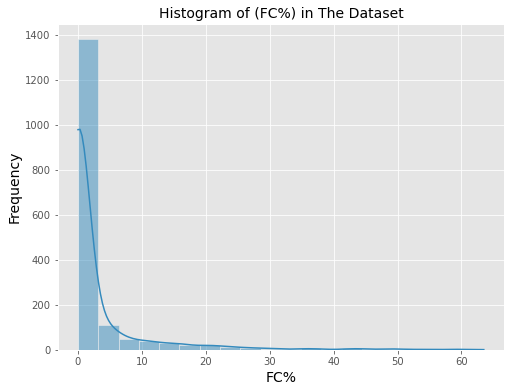

In [10]:
## Explore the AGE Column
plt.figure(figsize=(8, 6))
sns.histplot(x='FC%', data=df_new, bins=20, kde=True)
plt.xlabel('FC%', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of (FC%) in The Dataset', fontsize=14, color='k')
plt.show()

* > `It seems that it takes (exponential Distribution) -- I tried box-cox and natural-log but none of them was useful, box-cox can't be useful because of zeros`

---

### `Explore the (LC(ft/mile)) Column`

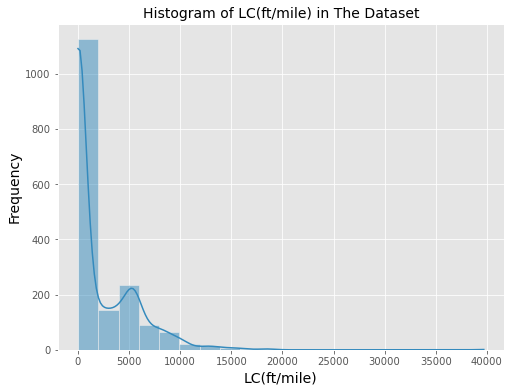

In [11]:
## Explore the LC(ft/mile) Column
plt.figure(figsize=(8, 6))
sns.histplot(x='LC(ft/mile)', data=df_new, bins=20, kde=True)
plt.xlabel('LC(ft/mile)', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of LC(ft/mile) in The Dataset', fontsize=14, color='k')
plt.show()

### `Explore the (TC(ft/mile)) Column`

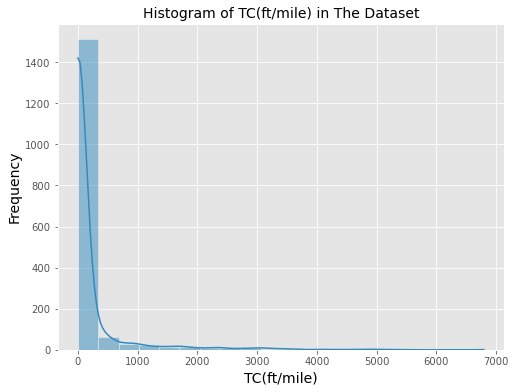

In [12]:
## Explore the LC(ft/mile) Column
plt.figure(figsize=(8, 6))
sns.histplot(x='TC(ft/mile)', data=df_new, bins=20, kde=True)
plt.xlabel('TC(ft/mile)', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of TC(ft/mile) in The Dataset', fontsize=14, color='k')
plt.show()

* > `Exploring the LC(ft/mile) & TC(ft/mile) Columns, -- > It seems that it takes (exponential Distribution) -- I tried box-cox and natural-log but none of them was useful, box-cox can't be useful because of zeros`

---

### `Explore (RUT(in)) Column`

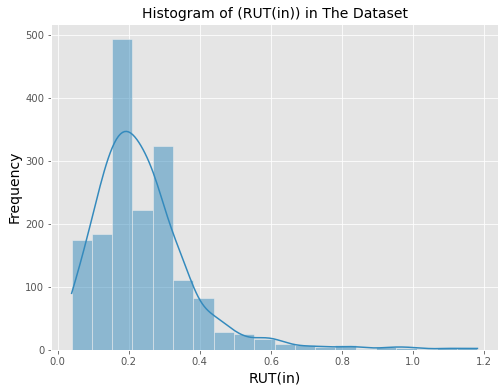

In [13]:
## Explore the RUT(in) Column
plt.figure(figsize=(8, 6))
sns.histplot(x='RUT(in)', data=df_new, bins=20, kde=True)
plt.xlabel('RUT(in)', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of (RUT(in)) in The Dataset', fontsize=14, color='k')
plt.show()

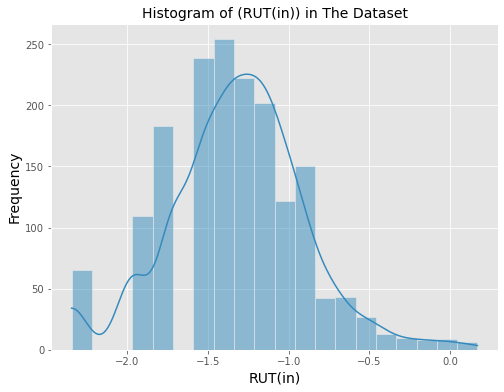

In [14]:
## Let's try Box-cox Transformation --> Normal Distribution
df_new['RUT(in)'], lmd_rut = boxcox(df_new['RUT(in)'])


## Explore the RUT(in) again
plt.figure(figsize=(8, 6))
sns.histplot(x='RUT(in)', data=df_new, bins=20, kde=True)
plt.xlabel('RUT(in)', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of (RUT(in)) in The Dataset', fontsize=14, color='k')
plt.show()

### `Check perason Correlation`

#### `Before Transformation`

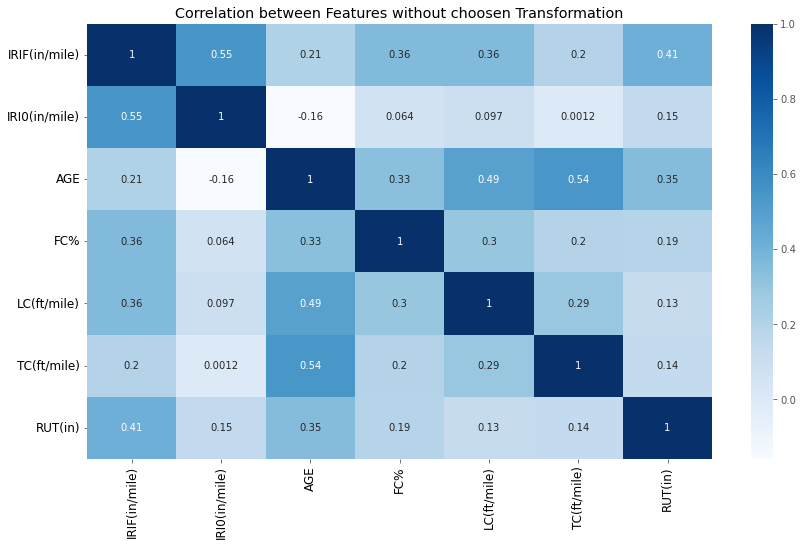

In [15]:
## Checking the (pearson) correlation before transformation we did --> (df)
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation between Features without choosen Transformation')
plt.xticks(rotation=90, c='k', fontsize=12)
plt.yticks(rotation=0, c='k', fontsize=12)
plt.show()

#### `After Transformation`

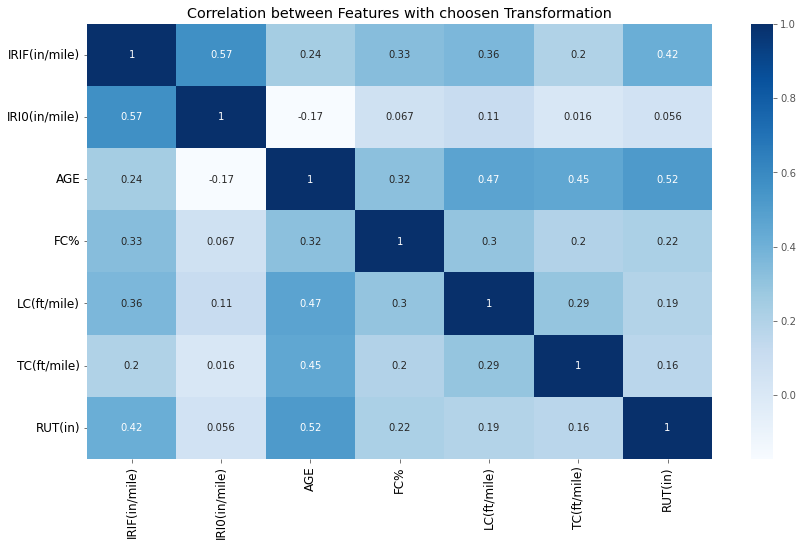

In [16]:
## Checking the (pearson) correlation after transformation we did --> (df_new)
plt.figure(figsize=(14, 8))
sns.heatmap(df_new.corr(), annot=True, cmap='Blues')
plt.title('Correlation between Features with choosen Transformation')
plt.xticks(rotation=90, c='k', fontsize=12)
plt.yticks(rotation=0, c='k', fontsize=12)
plt.show()

### `Histogram for all Features`

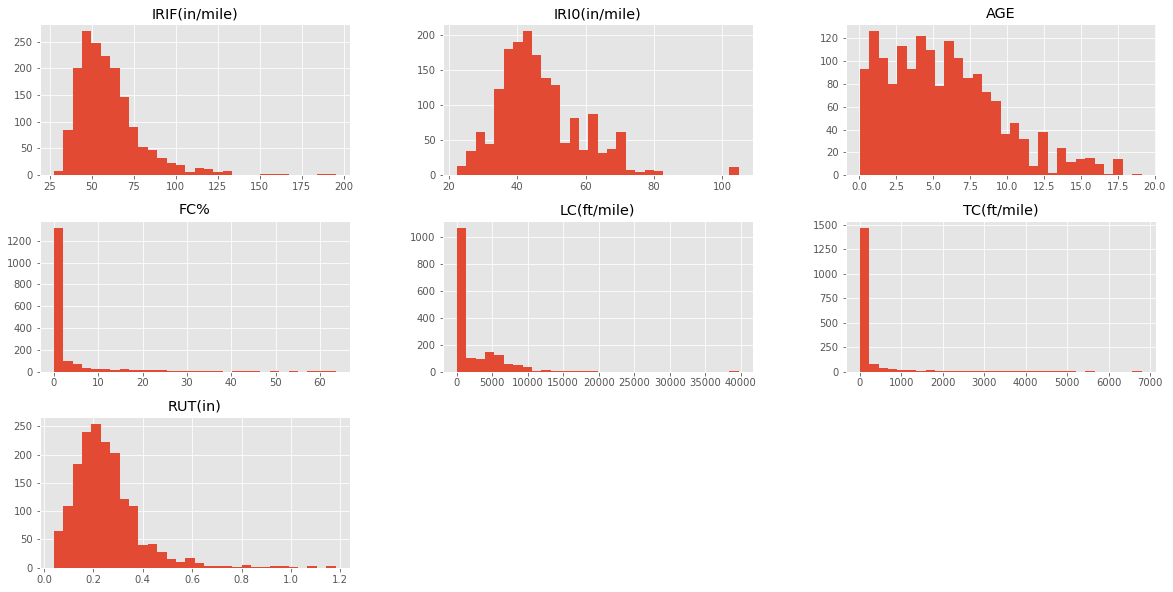

In [17]:
## Before Transformation
df.hist(figsize=(20, 10), bins=30, )
plt.ylabel('Frequency')
plt.show()

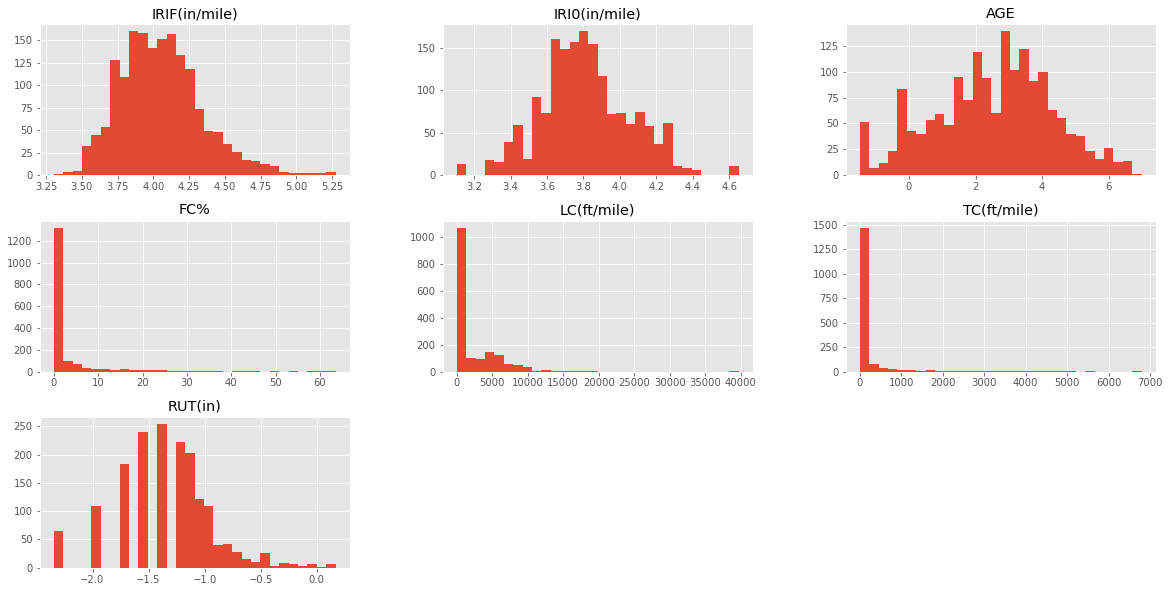

In [18]:
## after Transformation
df_new.hist(figsize=(20, 10), bins=30, )
plt.ylabel('Frequency')
plt.show()

------

### `Split the Dataset using the ordinary Method`
* `Very Important Note: `
    * `Split to target and Features -- split the original data and then do the transformation on splitted data`
    * `This technique helps to prevent information leak to the validation Dataset (by francois chollet)`

In [19]:
## split the dataset --> make the test set work as (validation and testing) as the dataset is very small
## It is enough to take 0.20 of the Dataset as a validation Dataset 

## Split to target and Features --> Note Impotant --> split the original data and then do the transformation on splitted data
X = df.drop(columns=['IRIF(in/mile)'], axis=1)  ## drop the target (Features)
y = df['IRIF(in/mile)']  ## target

## split to training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)


## check shapes after splitting
print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)
print('=='*15)
print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape => (1363, 6)
y_train shape => (1363,)
X_test shape => (341, 6)
y_test shape => (341,)


### `Preparing before Training Models`
* `Features`
    * `Apply natural log (value) Transformation for (IRI0(in/mile)) Column`
    * `Apply box-cox Transformation for (AGE & (RUT(in)) Columns`
    * `Apply StandardScaler(z-score) for all Features (Only Features not target) for each feature to be on scale: mean=0, std=1`
    <br /> <br />
* `Target`
    * `Apply natural log (value) Transformation for target (IRIF(in/mile)) Column`

#### [Kaggle Notes on box-cox](https://www.kaggle.com/rtatman/boxcox-transform-on-train-test-data)

In [20]:
## Features Transformation

## BoxCox for both (X_train) and (X_test) for both two columns
X_train['AGE'], lmd_age_train = boxcox(X_train['AGE'])            ## AGE  -- train
X_train['RUT(in)'], lmd_rut_train = boxcox(X_train['RUT(in)'])    ## RUT(in) -- train

## use the lambda that calculate from trained date and use it to test ---> Very tricky point and very important
X_test['AGE'] = boxcox(X_test['AGE'], lmbda=lmd_age_train)            ## AGE  -- test
X_test['RUT(in)'] = boxcox(X_test['RUT(in)'], lmbda=lmd_rut_train)    ## RUT(in) -- test


## taking the Natural log for (IRI0(in/mile)) (Feature)
X_train['IRI0(in/mile)'] = np.log(X_train['IRI0(in/mile)'])
X_test['IRI0(in/mile)'] = np.log(X_test['IRI0(in/mile)'])


## Scaling the Features to (mean=0, std=1) --> standard Normal Distr.
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train)  ## fit on train and transform on train 
X_test_final = scaler.transform(X_test)        ## only transform on test ---> tricky and very important note

In [21]:
## Target Transformation

## for target --> taking the log again, we almost ready to train Models
y_train_final = np.log(y_train)
y_test_final = np.log(y_test)

### `Building ML Models`
* `Our Evaluation metrics: MAE, MSE, R2 Score`

### `LinearRegression`

In [22]:
## Try simple LinearRegression
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_final, y_train_final)

LinearRegression()

In [23]:
## Predicted values using LinearRegression
y_pred_train_lin = np.exp(lin_reg.predict(X_train_final))
y_pred_test_lin = np.exp(lin_reg.predict(X_test_final))

## R2 Score
r2_score_train_lin = r2_score(y_train, y_pred_train_lin)
r2_score_test_lin = r2_score(y_test, y_pred_test_lin)

## MAE
mae_train_lin = mean_absolute_error(y_train, y_pred_train_lin)
mae_test_lin = mean_absolute_error(y_test, y_pred_test_lin)

## MSE
mse_train_lin = mean_squared_error(y_train, y_pred_train_lin)
mse_test_lin = mean_squared_error(y_test, y_pred_test_lin)


print('R2 Score for training Dataset using LinearRegression --> ', r2_score_train_lin)
print('R2 Score for validation Dataset using LinearRegression --> ', r2_score_test_lin)
print('**'*40)
print('MAE for training Dataset using LinearRegression --> ', mae_train_lin)
print('MAE for validation Dataset using LinearRegression --> ', mae_test_lin)
print('**'*40)
print('MSE for training Dataset using LinearRegression --> ', mse_train_lin)
print('MSE for validation Dataset using LinearRegression --> ', mse_test_lin)

R2 Score for training Dataset using LinearRegression -->  0.515373546131887
R2 Score for validation Dataset using LinearRegression -->  0.4351325657732781
********************************************************************************
MAE for training Dataset using LinearRegression -->  8.94471930010068
MAE for validation Dataset using LinearRegression -->  9.161589697137394
********************************************************************************
MSE for training Dataset using LinearRegression -->  202.75147397885664
MSE for validation Dataset using LinearRegression -->  226.96348896965011


### `SGD Regressor`

In [24]:
## Try SGD Regression
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_final, y_train_final)

SGDRegressor()

In [25]:
## Predicted values using LinearRegression
y_pred_train_sgd = np.exp(sgd_reg.predict(X_train_final))
y_pred_test_sgd = np.exp(sgd_reg.predict(X_test_final))

## R2 score
r2_score_train_sgd = r2_score(y_train, y_pred_train_sgd)
r2_score_test_sgd = r2_score(y_test, y_pred_test_sgd)

## MAE
mae_train_sgd = mean_absolute_error(y_train, y_pred_train_sgd)
mae_test_sgd = mean_absolute_error(y_test, y_pred_test_sgd)

## MSE
mse_train_sgd = mean_squared_error(y_train, y_pred_train_sgd)
mse_test_sgd = mean_squared_error(y_test, y_pred_test_sgd)



print('R2 Score for training Dataset using SGDRegression -->', r2_score_train_sgd)
print('R2 Score for validation Dataset using SGDRegression -->', r2_score_test_sgd)
print('**'*40)
print('MAE for training Dataset using SGDRegression -->', mae_train_sgd)
print('MAE for validation Dataset using SGDRegression -->', mae_test_sgd)
print('**'*40)
print('MSE for training Dataset using SGDRegression --> ', mse_train_sgd)
print('MSE for validation Dataset using SGDRegression --> :', mse_test_sgd)  

R2 Score for training Dataset using SGDRegression --> 0.5158455672113604
R2 Score for validation Dataset using SGDRegression --> 0.43155827631906996
********************************************************************************
MAE for training Dataset using SGDRegression --> 8.950920340476273
MAE for validation Dataset using SGDRegression --> 9.166389673537996
********************************************************************************
MSE for training Dataset using SGDRegression -->  202.55399617126182
MSE for validation Dataset using SGDRegression --> : 228.3996369150969


### `Try KNN`

In [26]:
## Define the Model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_final, y_train_final)

KNeighborsRegressor()

In [27]:
## Predicted values using KNN
y_pred_train_knn = np.exp(knn_reg.predict(X_train_final))
y_pred_test_knn = np.exp(knn_reg.predict(X_test_final))

## R2 score
r2_score_train_knn = r2_score(y_train, y_pred_train_knn)
r2_score_test_knn = r2_score(y_test, y_pred_test_knn)

## MAE
mae_train_knn = mean_absolute_error(y_train, y_pred_train_knn)
mae_test_knn = mean_absolute_error(y_test, y_pred_test_knn)

## MSE
mse_train_knn = mean_squared_error(y_train, y_pred_train_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)


print('R2 Score for training Dataset using KNN -->', r2_score_train_knn)
print('R2 Score for validation Dataset using KNN -->', r2_score_test_knn)
print('**'*40)
print('MAE for training Dataset using KNN -->', mae_train_knn)
print('MAE for validation Dataset using KNN -->', mae_test_knn)
print('**'*40)
print('MSE for training Dataset using KNN --> ', mse_train_knn)
print('MSE for validation Dataset using KNN --> :', mse_test_knn)   #### very good

R2 Score for training Dataset using KNN --> 0.8022476554118243
R2 Score for validation Dataset using KNN --> 0.6793649524383365
********************************************************************************
MAE for training Dataset using KNN --> 5.26314199424744
MAE for validation Dataset using KNN --> 6.356826418211763
********************************************************************************
MSE for training Dataset using KNN -->  82.73295654417326
MSE for validation Dataset using KNN --> : 128.831022415316


* `Tuning KNN usin cross Validation witk Kfolds=5 & scoring='r2`

#### `Tuning KNN`

In [28]:
## Tuning KNN
params_best_knn = {'n_neighbors': np.arange(1, 10, 2)}

grid_knn = GridSearchCV(estimator=knn_reg, param_grid=params_best_knn, cv=5, scoring='r2', n_jobs=-1)
grid_knn.fit(X_train_final, y_train_final)

print('Best Parameters: ', grid_knn.best_params_)

## best Model with best parameters
best_knn = grid_knn.best_estimator_
print('Best Model KNN: ', best_knn)

Best Parameters:  {'n_neighbors': 3}
Best Model KNN:  KNeighborsRegressor(n_neighbors=3)


In [29]:
## Predicted values using KNN
y_pred_train_knn = np.exp(best_knn.predict(X_train_final))
y_pred_test_knn = np.exp(best_knn.predict(X_test_final))

## R2 score
r2_score_train_knn = r2_score(y_train, y_pred_train_knn)
r2_score_test_knn = r2_score(y_test, y_pred_test_knn)

## MAE
mae_train_knn = mean_absolute_error(y_train, y_pred_train_knn)
mae_test_knn = mean_absolute_error(y_test, y_pred_test_knn)

## MSE
mse_train_knn = mean_squared_error(y_train, y_pred_train_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)


print('R2 Score for training Dataset using KNN -->', r2_score_train_knn)
print('R2 Score for validation Dataset using KNN -->', r2_score_test_knn)
print('**'*40)
print('MAE for training Dataset using KNN -->', mae_train_knn)
print('MAE for validation Dataset using KNN -->', mae_test_knn)
print('**'*40)
print('MSE for training Dataset using KNN --> ', mse_train_knn)
print('MSE for validation Dataset using KNN --> :', mse_test_knn)   

R2 Score for training Dataset using KNN --> 0.872911341848468
R2 Score for validation Dataset using KNN --> 0.6939145500536312
********************************************************************************
MAE for training Dataset using KNN --> 4.107500675472757
MAE for validation Dataset using KNN --> 6.279636264050541
********************************************************************************
MSE for training Dataset using KNN -->  53.16963727537364
MSE for validation Dataset using KNN --> : 122.98500043249024


### `Try RandomForest`

In [30]:
## Define the Model
forest_reg = RandomForestRegressor(n_estimators=200, max_depth=20)  ## some random intialization Hyperparameters
forest_reg.fit(X_train_final, y_train_final)

RandomForestRegressor(max_depth=20, n_estimators=200)

In [31]:
## Predicted values using RandomForest
y_pred_train_forest = np.exp(forest_reg.predict(X_train_final))
y_pred_test_forest = np.exp(forest_reg.predict(X_test_final))


## R2 score
r2_score_train_forest = r2_score(y_train, y_pred_train_forest)
r2_score_test_forest = r2_score(y_test, y_pred_test_forest)

## MAE
mae_train_forest = mean_absolute_error(y_train, y_pred_train_forest)
mae_test_forest = mean_absolute_error(y_test, y_pred_test_forest)

## MSE
mse_train_forest = mean_squared_error(y_train, y_pred_train_forest)
mse_test_forest = mean_squared_error(y_test, y_pred_test_forest)


print('R2 Score for training Dataset using RF -->', r2_score_train_forest)
print('R2 Score for validation Dataset using RF -->', r2_score_test_forest)
print('**'*40)
print('MAE for training Dataset using RF -->', mae_train_forest)
print('MAE for validation Dataset using RF -->', mae_test_forest)
print('**'*40)
print('MSE for training Dataset using RF --> ', mse_train_forest)
print('MSE for validation Dataset using RF --> :', mse_test_forest)  

R2 Score for training Dataset using RF --> 0.9656961977124521
R2 Score for validation Dataset using RF --> 0.7715580075407067
********************************************************************************
MAE for training Dataset using RF --> 1.8684183430892078
MAE for validation Dataset using RF --> 4.7522198651197645
********************************************************************************
MSE for training Dataset using RF -->  14.351561746921073
MSE for validation Dataset using RF --> : 91.78789304205029


* > `Tuning of RF will not be very useful, I tried but it will not be much helpful as it is only a baseline`

### `Feature Importance for RF`

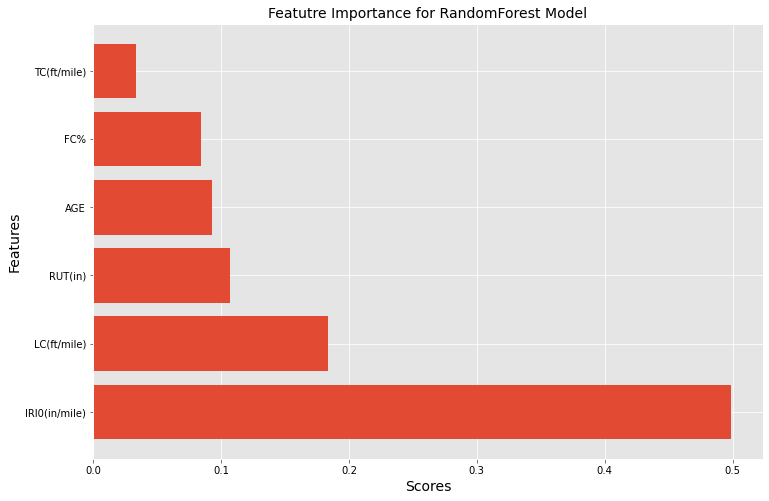

In [32]:
feat_dict = {}
for name, score in zip(X_train.columns, forest_reg.feature_importances_):
    feat_dict[name] = score
keys_forest = feat_dict.keys()
values_forest = feat_dict.values()

df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)

## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutre Importance for RandomForest Model', fontsize=14, c='k')
plt.xlabel('Scores', fontsize=14, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.show()

### `Xgboost`

### [Understand GBRT](https://towardsdatascience.com/machine-learning-part-18-boosting-algorithms-gradient-boosting-in-python-ef5ae6965be4)

In [33]:
## Define Xgboost -- our Hero
xgb_reg = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=300, reg_alpha=0.8, subsample=0.9)

## fitting
xgb_reg.fit(X_train_final, y_train_final)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.8, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
## Predicted values using Xgboost
y_pred_train_xgb = np.exp(xgb_reg.predict(X_train_final))
y_pred_test_xgb = np.exp(xgb_reg.predict(X_test_final))

## R2 score
r2_score_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_score_test_xgb = r2_score(y_test, y_pred_test_xgb)

## MAE
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

## MSE
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)


print('R2 Score for training Dataset using GBRT -->', r2_score_train_xgb)
print('R2 Score for validation Dataset using GBRT -->', r2_score_test_xgb)
print('**'*40)
print('MAE for training Dataset using GBRT -->', mae_train_xgb)
print('MAE for validation Dataset using GBRT -->', mae_test_xgb)
print('**'*40)
print('MSE for training Dataset using GBRT --> ', mse_train_xgb)
print('MSE for validation Dataset using GBRT --> :', mse_test_xgb) 

R2 Score for training Dataset using GBRT --> 0.9496160598095248
R2 Score for validation Dataset using GBRT --> 0.8079562037715013
********************************************************************************
MAE for training Dataset using GBRT --> 2.6937583403234995
MAE for validation Dataset using GBRT --> 4.629376894033705
********************************************************************************
MSE for training Dataset using GBRT -->  21.078952783005633
MSE for validation Dataset using GBRT --> : 77.1631136545606


### `Tuning Xgboost`

In [35]:
## Tuning xgboost
params_best_xgb = {'max_depth': [4, 5, 6], 
                  'learning_rate': [0.1, 0.15, 0.2], 
                  'n_estimators': [100, 150, 200, 300],
                  'subsample': [0.9, 1], 
                   'reg_alpha': [0, 0.5, 1, 2]}

## using GridSearcCV
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train_final)

print('Best Parameters: ', grid_xgb.best_params_)
print('***'*50)
## best Model with best parameters
best_xgb = grid_xgb.best_estimator_
print('Best Model Xgboost: ', best_xgb)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0, 'subsample': 0.9}
******************************************************************************************************************************************************
Best Model Xgboost:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [36]:
## Predicted values using Xgboost
y_pred_train_xgb = np.exp(best_xgb.predict(X_train_final))
y_pred_test_xgb = np.exp(best_xgb.predict(X_test_final))

## R2 score
r2_score_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_score_test_xgb = r2_score(y_test, y_pred_test_xgb)

## MAE
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

## MSE
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)


print('R2 Score for training Dataset using GBRT -->', r2_score_train_xgb)
print('R2 Score for validation Dataset using GBRT -->', r2_score_test_xgb)
print('**'*40)
print('MAE for training Dataset using GBRT -->', mae_train_xgb)
print('MAE for validation Dataset using GBRT -->', mae_test_xgb)
print('**'*40)
print('MSE for training Dataset using GBRT --> ', mse_train_xgb)
print('MSE for validation Dataset using GBRT --> :', mse_test_xgb)   ## model is a little bit overfitting but it is accepptable

R2 Score for training Dataset using GBRT --> 0.9990660533062017
R2 Score for validation Dataset using GBRT --> 0.852289006817916
********************************************************************************
MAE for training Dataset using GBRT --> 0.43712357763308884
MAE for validation Dataset using GBRT --> 3.571916931967659
********************************************************************************
MSE for training Dataset using GBRT -->  0.39073201075571257
MSE for validation Dataset using GBRT --> : 59.35021270552126


### `Feature Importance for tuned model of xgboost `

`importance_types`
* `‘weight’ - the number of times a feature is used to split the data across all trees. --> I used this Method`
* `‘gain’ - the average gain across all splits the feature is used in.`
* `‘cover’ - the average coverage across all splits the feature is used in.`
* `‘total_gain’ - the total gain across all splits the feature is used in.`
* `‘total_cover’ - the total coverage across all splits the feature is used in.`

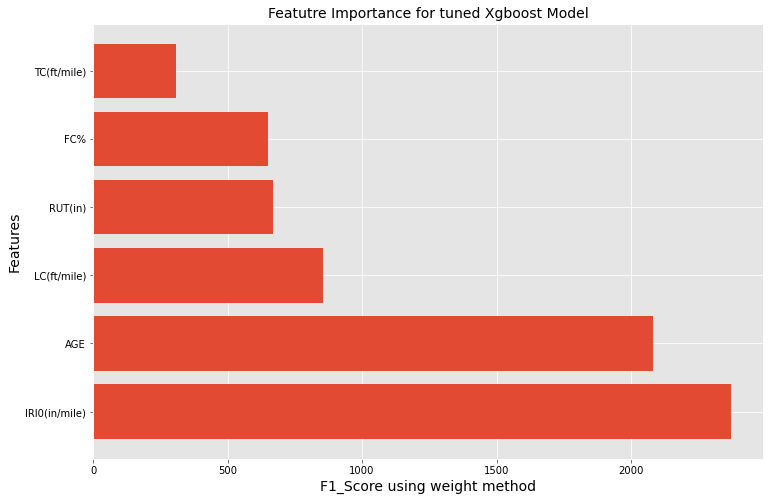

In [37]:
## get and sort 
feat_import = best_xgb.get_booster().get_score(importance_type='weight')  ## using weight Method
feat_import = pd.DataFrame.from_dict(feat_import, orient='index')
feat_import = feat_import.reset_index()
feat_import = feat_import.rename(columns={'index': 'Features', 0:'f_scores'})

feat_import['Features'] = X_train.columns.values.tolist()
df_feat_import =feat_import.sort_values(by='f_scores', ascending=False)
df_feat_import

## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import['Features'], width=df_feat_import['f_scores'])
plt.title('Featutre Importance for tuned Xgboost Model', fontsize=14, c='k')
plt.xlabel('F1_Score using weight method', fontsize=14, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.show()

### `Finally, I will use Xgboost as my Evaluation Model -- (best_xgb) -- the tuned Xgboost Model`

----

### `Inference on test and total Dataset`

In [38]:
## Inference on test Dataset
y_pred_test_final = best_xgb.predict(X_test_final)   ## remember, we took the natural log(value) --> take the exp()
y_pred_test_final = np.exp(y_pred_test_final)

## R2 score
r2_score_test_xgb_tuned = r2_score(y_test, y_pred_test_final)

## MAE
mae_test_xgb_tuned = mean_absolute_error(y_test, y_pred_test_final)

## MSE
mse_test_xgb_tuned = mean_squared_error(y_test, y_pred_test_final)


print('R2 Score for validation Dataset using tuned GBRT -->', r2_score_test_xgb)
print('**'*40)
print('MAE for validation Dataset using tuned GBRT -->', mae_test_xgb_tuned)
print('**'*40)
print('MSE for validation Dataset using tuned GBRT --> :', mse_test_xgb_tuned) 

R2 Score for validation Dataset using tuned GBRT --> 0.852289006817916
********************************************************************************
MAE for validation Dataset using tuned GBRT --> 3.571916931967659
********************************************************************************
MSE for validation Dataset using tuned GBRT --> : 59.35021270552126


In [39]:
## concatenate the train and test Datasets after processing for Features
X_total = np.vstack((X_train_final, X_test_final))
## concatenate the train and test Datasets after processing for target 
y_total = np.vstack((y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)))

## Inference on total Dataset
y_pred_total_final = best_xgb.predict(X_total)   ## remember, we took the log(value) --> take the exp()
y_pred_total_final = np.exp(y_pred_total_final)


## R2 score
r2_score_total_xgb_tuned = r2_score(y_total, y_pred_total_final)

## MAE
mae_total_xgb_tuned = mean_absolute_error(y_total, y_pred_total_final)

## MSE
mse_total_xgb_tuned = mean_squared_error(y_total, y_pred_total_final)


print('R2 Score for total Dataset using tuned GBRT -->', r2_score_total_xgb_tuned)
print('**'*40)
print('MAE for total Dataset using tuned GBRT -->', mae_total_xgb_tuned)
print('**'*40)
print('MSE for total Dataset using tuned GBRT --> ', mse_total_xgb_tuned)

R2 Score for total Dataset using tuned GBRT --> 0.9706341091855735
********************************************************************************
MAE for total Dataset using tuned GBRT --> 1.0644501819922954
********************************************************************************
MSE for total Dataset using tuned GBRT -->  12.189548276550934


### `Models Comparison`

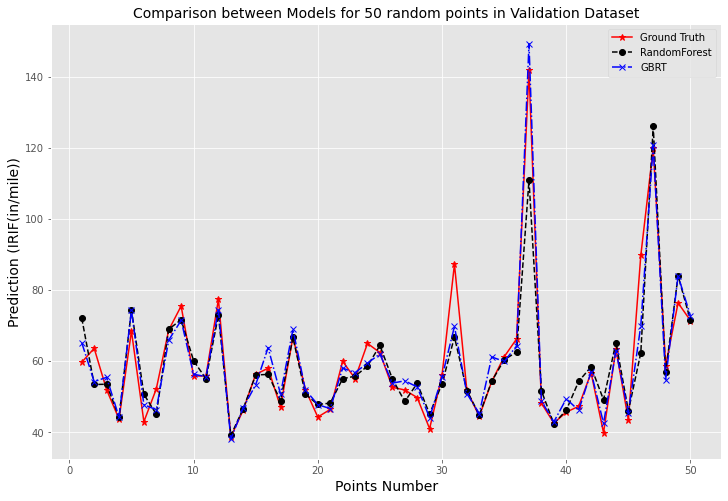

In [40]:
## 50 random points from validation dataset [150: 200]
x = np.arange(1, 51)  ## 50 points

## plotting
plt.figure(figsize=(12, 8))
plt.plot(x, y_test[200:250], 'r*-', label='Ground Truth', markersize=7)
plt.plot(x, y_pred_test_forest[200:250], 'ko--', label='RandomForest')
plt.plot(x, y_pred_test_xgb[200: 250], 'bx-.', label='GBRT')
plt.title('Comparison between Models for 50 random points in Validation Dataset', fontsize=14, color='k')
plt.xlabel('Points Number', fontsize=14, color='k')
plt.ylabel('Prediction (IRIF(in/mile))', fontsize=14, color='k')
plt.legend()
plt.show()

### `Download the Model`

In [41]:
## Download the Model
joblib.dump(best_xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']

-----

----

### `The Processing PipeLine`
* `Firstly: Splitting the Data to train and test, use test as validation as data is too small, test=20% of dataset` <br> <br>

* `Secondly : For Features`
    * `1. (IRI0(in/mile)) Column: Applying natural log (value)`
    * `1. (AGE) Column : Applying box-cox Transformation`
    * `2. (RUT(in)) Column : Applying box-cox Transformation`
    * `3. For all Features : Using Standard Scaler to convert the Distr. to mean=0, std=1`
<br> <br>

* ` Thirdly : For target (IRIF(in/mile))`
    * `The Model predicted the values at log scale, you MUST take the exponential values`

### `For Further Improvement`
* `Increase the size of this Dataset`
* `Try to get some new columns which are more correlated with the target, it requires some Domain Knowledge`

### Done  @ 19, Mars, 2022